In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw3.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **The notebook you submit must be run in order with all output visible**

### Import Libraries

In [3]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

from sklearn.linear_model import Lasso, LassoCV

%matplotlib inline

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)

- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)

- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)

- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)

- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)

- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)

- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


In [4]:
# TODO
# Fill in writing
# Check code/functions and variables
#    clean up variables
#    fix plotting function so can do one-liner
#    separate dictionary appending from value getting
# check all figures for data, title,
#

In [5]:
# Results list containing dictionary
results = []
r2_list = []

random_state = 109

<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    

Generate a *well-labeled* scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

_Points:_ 3

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

In [6]:
df_train = pd.read_csv('data/bacteria_train.csv')

In [7]:
df_test = pd.read_csv('data/bacteria_test.csv')

In [8]:
df_train.head(), df_train.shape, df_test.head(), df_test.shape

(   Perc_population  Spreading_factor
 0            1.535          0.190708
 1            5.555          0.326928
 2           -0.277         -0.459699
 3            1.724         -0.193013
 4           -0.550         -0.835745,
 (423, 2),
    Perc_population  Spreading_factor
 0           -0.516         -1.138880
 1           -0.683         -1.818070
 2           -0.045         -1.883300
 3            1.125         -0.839582
 4           -0.679         -1.478480,
 (108, 2))

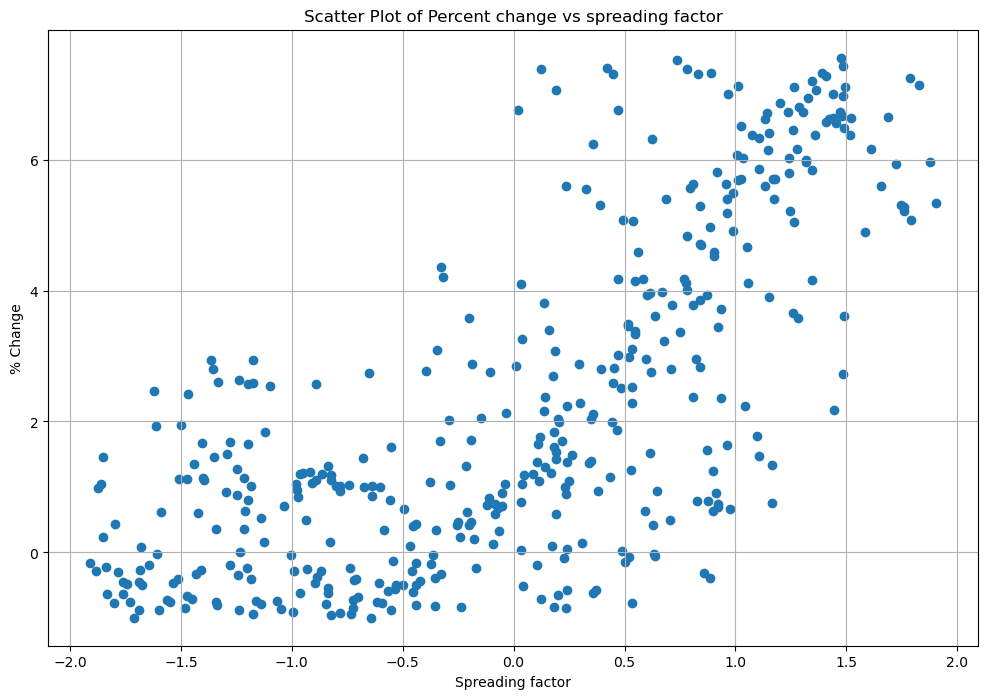

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(df_train['Spreading_factor'], df_train['Perc_population'])
# plt.axhline(0)
plt.ylabel('% Change')
plt.xlabel('Spreading factor')
plt.title('Scatter Plot of Percent change vs spreading factor')
plt.grid()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

Based on the graph above, is there any discernable relationship between the spreading factor and percentage change in population?

_Points:_ 2

At first glance, it seems like there is no percent change at spreading factor < 0. On the other hand, an increasing spreading factor > 0 show a positive linear relationship with percent change of bacteria population (increasing # change as spreading factorn > 0 increases). Taking the whole scatter plot as a whole, the sigmoidal shape of the scatter plot suggests a quadratic relationship (polynomial). The plot curves upwards at x = spreading factor = 0, and starts to plateau at x = 1.5. 

<!-- END QUESTION -->

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.1</b></div>

Based on your inspection in question 1, guesstimate the degree of the polynomial you believe would best fit the training while still generalizing well. Store this degree in the variable `guessed_deg`. 

Next, use `PolynomialFeatures()` to generate a design matrices of the guesstimated degree for the train and test data. Store these in `x_poly_train` and `x_poly_test`. **You should not include a bias in your design matrix.**

_Points:_ 2

In [10]:
y_train = df_train['Perc_population']
y_test = df_test['Perc_population']
x_train = df_train[['Spreading_factor']]
x_test = df_test[['Spreading_factor']]

In [11]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((423,), (108,), (423, 1), (108, 1))

In [12]:
# Initialize parameters for polynomial regression and linear regression
guessed_deg = 3
include_bias = False  
fit_intercept = True

In [13]:
# Polynomial regression, fit transfrom on train and only transform on test datasets
poly = PolynomialFeatures(degree=guessed_deg, interaction_only=False, include_bias=include_bias)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
# poly.get_feature_names_out()

In [14]:
# make into DataFrame
x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())
x_poly_train_df.head(2)

,Spreading_factor,Spreading_factor^2,Spreading_factor^3
0,0.190708,0.036370,0.006936
1,0.326928,0.106882,0.034943


In [15]:
# make into DataFrame
x_poly_test_df = pd.DataFrame(x_poly_test, columns=poly.get_feature_names_out())
x_poly_test_df.head(2)

,Spreading_factor,Spreading_factor^2,Spreading_factor^3
0,-1.13888,1.297048,-1.477182
1,-1.81807,3.305379,-6.009410


In [16]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2</b></div>

Fit a polynomial regression using scikit-learn's `LinearRegression()` on the training design matrix. 

To track and compare the performance of each of the models in this notebook, use a list of dictionaries called `results`.

Each dictionary in this list will have the keys: 'model' (a string representing the question number where the model was fit), 'train_mse', and 'test_mse'.

So, for this question, you will append a dictionary to `results` of the form:
```python
{'model': '2.2', 'train_mse': 2.6749 'test_mse': 2.734}
```
Note that your MSE scores will not be the same as those in the example dictionary.

_Points:_ 2

In [17]:
# Fit a linear regression model
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(x_poly_train_df, y_train)

LinearRegression()

In [18]:
linreg.coef_, linreg.intercept_

(array([ 2.12338009,  0.69422214, -0.09858653]), 1.5449914507699227)

In [19]:
# predict to find r2 scores for train and test dataset
y_test_pred = linreg.predict(x_poly_test_df)
r2_train = linreg.score(x_poly_train_df, y_train) # R^2
r2_test = linreg.score(x_poly_test_df, y_test)

print(f'R^2 train = {r2_train:.3}')
print(f'R^2 test = {r2_test:.3}')

# Predict train and test y values y_pred
y_train_pred = linreg.predict(x_poly_train_df)
y_test_pred = linreg.predict(x_poly_test_df)

#Compute the MSE of the model for train and test
lin_train_mse = mean_squared_error(y_train, y_train_pred)
lin_test_mse = mean_squared_error(y_test, y_test_pred)

#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, y_test_pred)

print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

R^2 train = 0.587
R^2 test = 0.616
Linear regression model results:

	Train MSE	2.6534
	Test MSE	2.6519

	Test R-squared	0.6159


In [20]:
results.append({'model':'2.2', 'train_mse': lin_train_mse, 'test_mse': lin_test_mse})

In [21]:
r2_list.append({'model':'2.2', 'train_r2':r2_train, 'test_r2':r2_test})
r2_list

[{'model': '2.2',
  'train_r2': 0.5867787520509838,
  'test_r2': 0.6159435977872276}]

In [22]:
results

[{'model': '2.2',
  'train_mse': 2.6534065590397877,
  'test_mse': 2.6519056545149606}]

In [23]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3</b></div>

- Create a plot showing both the train and test data, as well as your model's prediction curve.
- Display `results` as a DataFrame.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  

_Points:_ 3

The guesstimation of 3 was due to the fact that the shape of the train dataset plot resembles a sigmoid (s-shaped) curve, which suggests a cubic polynomial relationship. The plots seem to show 2 inflection points - a local minima and a cluster of datasets suggesting a local maxima. The poly degree of 3 leads to a lower set of train MSE, test MSE, and a higher R-squared value (2.6534, 2.6519, 0.6159) than a poly degree of 2 (2.6617, 2.6749, 0.6126).

In [24]:
def plot_model(q, model, x_poly_train, x_poly_train_df):
    # Plotting training and testing dataset with regression line
    plt.figure(figsize=(12,8))

    # plot train and testing data
    plt.scatter(x_train, y_train, alpha=0.45, label='train')
    plt.scatter(x_test, y_test, alpha=0.45, label='test')
    # plt.plot(x_train, y_train_pred, '-' , label='True function',linewidth=4, color='#9FC131')
    # plt.scatter(x_train, y_train_pred, alpha=0.35, label='train_predicted')
    sorted_idx=np.argsort(x_poly_train[:,0])
    plt.plot(x_poly_train[:,0][sorted_idx], model.predict(x_poly_train_df)[sorted_idx], label='train predicted')

    # plt.scatter(x_test, y_test_pred, alpha=0.35, label='test_predicted')
    plt.xlabel('Spreading factor')
    plt.ylabel('% Change')
    plt.title(f'Q{q}: Plotting train, test, and model prediction curve')
    plt.legend()
    plt.grid()
    plt.show()

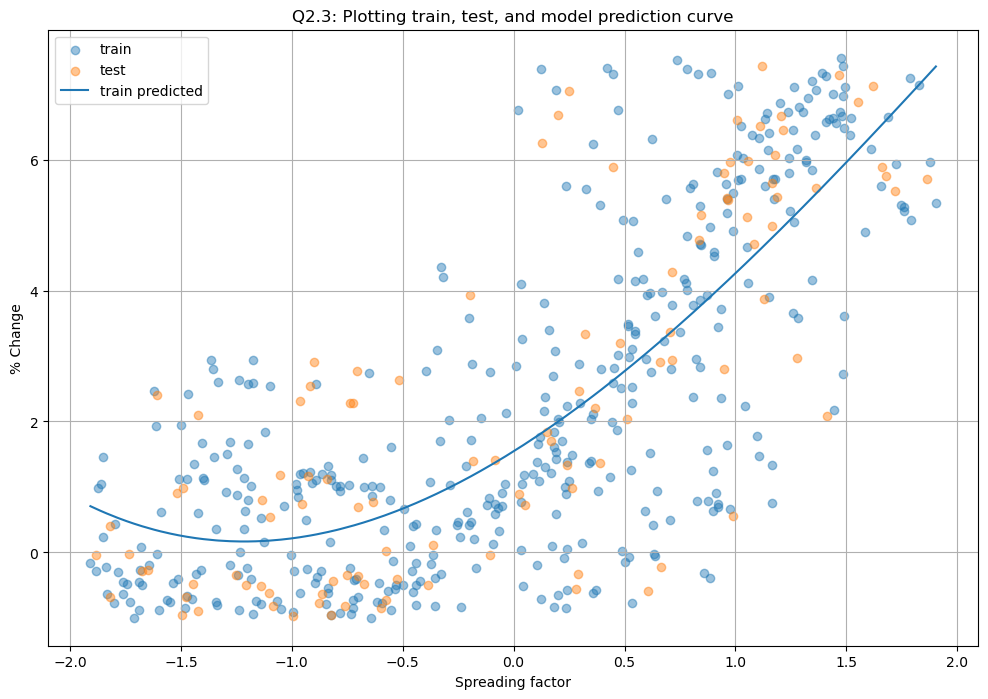

In [25]:
# Plot model from training set (guesstimated model)
plot_model('2.3', linreg, x_poly_train, x_poly_train_df)    

In [26]:
# print results as df
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.653407,2.651906


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.4</b></div>

Now we will compute confidence intervals for the coefficients generated by our model specification. For the same degree polynomial regression fit above in 2.2, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:
- Report the coefficient values of the model fit above in 2.2.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data. You should use **100 bootstrapped samples**.
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

_Points:_ 7

The coefficient values of model from 2.2 (2.12, 0.69, -0.098) is almost similar to the bootstrapping means (2.10, 0.69, -0.09). Inspecting the 95% confidence interval of b3, where -0.23 < b3 < 0.05, it is likely that there is no relationship between b3 = Spreading_factor^3 and the response variable, since the 95% confidence interval overlaps with 0.0.

In [27]:
# create a results dataframe by combining the features names with the coefficients
print(f'Intercept: {linreg.intercept_:.3}')
results_coef = pd.DataFrame(zip(x_poly_test_df.columns, linreg.coef_), columns=['feature', 'coeff'])
results_coef

Intercept: 1.54


,feature,coeff
0,Spreading_factor,2.123380
1,Spreading_factor^2,0.694222
2,Spreading_factor^3,-0.098587


In [28]:
# define number of bootsrap sample
n_boots = 100

In [29]:
# Function to get bootstrap values -> polynomial regression
def bootstrap_polynomial_regression(n):

    # Lists to save models and coefficients
    boot_models = []
    boot_betas = []

    # Add intercept in model
    fit_intercept = True

    for i in range(n):

        # Sample training dataset
        boot_i = np.random.choice(x_poly_train_df.index, 
                                  replace = True, 
                                  size = len(x_poly_train_df.index))
        # print(boot_i)
        # Create bootstrap datasets
        X_train_boot = x_poly_train_df.iloc[boot_i,:]
        y_train_boot = y_train.iloc[boot_i]

        # run linear regression
        boot_linreg = LinearRegression(fit_intercept=fit_intercept).fit(X_train_boot, y_train_boot)
        boot_models.append(boot_linreg)
        
        # print(boot_linreg.coef_)
        # print(boot_linreg.intercept_)
        
        # Combine intercept + coefficients
        # coefs = np.insert(boot_linreg.coef_[0], 0, np.asarray(boot_linreg.intercept_)[0], axis=None)
        coefs = [boot_linreg.intercept_]
        [coefs.append(coef) for coef in boot_linreg.coef_]
        # for coef in boot_linreg.coef_:
        #     coefs.append(coef)
        # print(type(coefs), coefs)
        #print(type(boot_betas))
        
        boot_betas.append(coefs)
        
    # Add header to list of y-intercept + coefficients
    feature_names = ['x0']+list(x_poly_train_df.columns)
    boot_betas_df = pd.DataFrame(boot_betas, columns=feature_names) 
    boot_betas_df.head()
        
    return boot_models, boot_betas_df

boot_models, boot_betas_df = bootstrap_polynomial_regression(n_boots)

In [30]:
len(boot_models), len(boot_betas_df)

(100, 100)

In [31]:
# # Add header to list of y-intercept + coefficients
feature_names = ['x0']+list(x_poly_train_df.columns)
# boot_betas_df = pd.DataFrame(boot_betas, columns=feature_names) 
boot_betas_df.head()

,x0,Spreading_factor,Spreading_factor^2,Spreading_factor^3
0,1.692150,2.353270,0.579808,-0.232088
1,1.264524,2.135489,0.787424,-0.081043
2,1.329382,2.145384,0.896576,-0.093168
3,1.595003,2.010165,0.702538,-0.034034
4,1.620929,2.245816,0.726331,-0.105829


In [32]:
def coefficient_confidence_intervals(boot_betas_df):
    stats_list = []
    
    feature_names = boot_betas_df.columns
    
    for i in range(len(boot_betas_df.columns)):
        betavals = boot_betas_df.iloc[:, i]
        betavals.values.sort()
        
        # Find lower and upper CI
        x1 = np.round(np.percentile(betavals, 2.5), 2)
        x2 = np.round(np.percentile(betavals, 97.5), 2)
        mean = np.round(np.mean(betavals),2)
        std = np.round(np.std(betavals),2)
        print(f'{feature_names[i]}, {mean}, {std}, [{x1}, {x2}]')
        
        # Save in list
        stats_list.append([feature_names[i], mean, std, x1, x2])
    
    
    # Create dataframe to store results
    boot_beta_CI_df = pd.DataFrame(stats_list, columns=['feature', 'boot_mean', 'boot_std', '95_low', '95_high'])
    coef_dict = dict(zip(boot_beta_CI_df.feature, np.abs(boot_beta_CI_df.boot_mean)))
    print(coef_dict)
    
    return boot_beta_CI_df

beta_ci_df = coefficient_confidence_intervals(boot_betas_df)

x0, 1.54, 0.13, [1.27, 1.73]
Spreading_factor, 2.12, 0.19, [1.78, 2.51]
Spreading_factor^2, 0.71, 0.08, [0.58, 0.87]
Spreading_factor^3, -0.09, 0.08, [-0.25, 0.06]
{'x0': 1.54, 'Spreading_factor': 2.12, 'Spreading_factor^2': 0.71, 'Spreading_factor^3': 0.09}


In [33]:
beta_ci_df.head()

,feature,boot_mean,boot_std,95_low,95_high
0,x0,1.54,0.13,1.27,1.73
1,Spreading_factor,2.12,0.19,1.78,2.51
2,Spreading_factor^2,0.71,0.08,0.58,0.87
3,Spreading_factor^3,-0.09,0.08,-0.25,0.06


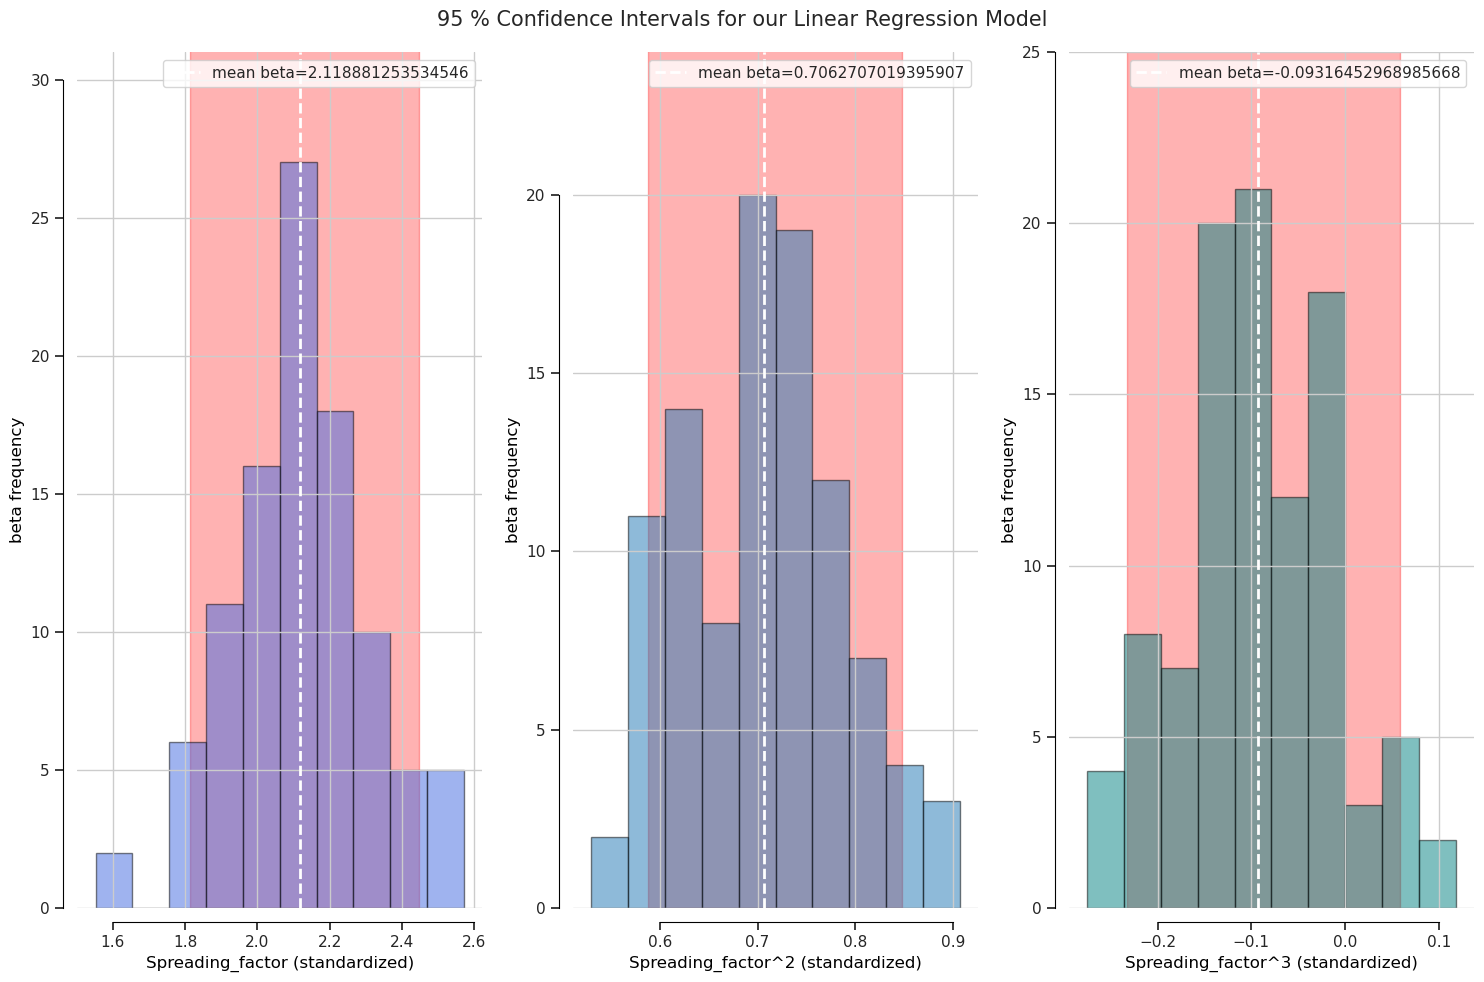

In [34]:
def plot_beta_ci(df, plt_h, plt_w):
    feature_names = df['feature']
    
    hist_colors = ["royalblue","tab:blue", "teal", "lightsteelblue"]
    fig, ax = plt.subplots(plt_h, plt_w, figsize = (15,10))
    ax = ax.ravel()
    sns.set(style="white", color_codes=True)
    
    for i in range(plt_h*plt_w):
        betavals = boot_betas_df.iloc[ : , i+1]
        betavals.values.sort()

        x1 = np.percentile(betavals, 5)
        x2 = np.percentile(betavals, 95)

        x = np.linspace( x1, x2, 500)
        counts, bins = np.histogram( betavals )
        y = counts.max() 
        plt.sca( ax[i] )
        plt.fill_between(x, y+100, color = 'red',alpha=0.3)
        plt.hist(betavals, 
                 bins = bins, 
                 color=hist_colors[i],
                 alpha=0.5,
                 edgecolor='black', 
                 linewidth=1)
        plt.ylim(0,y+ 4)
        #plt.ylabel(f'Distribution', fontsize=12)
        plt.ylabel('beta frequency', fontsize=12)
        plt.xlabel(f'{feature_names[i+1]} (standardized)', fontsize=12)
        plt.axvline(x = np.mean(betavals), color='w', linewidth = 2, linestyle = "--", label=rf'mean beta={np.mean(betavals)}')
        plt.legend()
        plt.grid()

    fig.suptitle(f'95 % Confidence Intervals for our Linear Regression Model', fontsize = 15)
    sns.despine(offset=10, trim=True);
    plt.tight_layout()    
    
plot_beta_ci(beta_ci_df, 1, 3)

<!-- END QUESTION -->

<a id="part3"></a>

## <div class='exercise'>Question 3: Single validation set [12 pts]</div> 

In this section you'll find the best degree polynomial relationship using a single validation set.

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1</b></div>

Split your original training data such that you separate out 20% into a single validation split. Use `random_state=1` and save the resulting splits as `x_train80`, `x_val`, `y_train80`, `y_val`. (This will prevent the overwriting of the original train data variables).

_Points:_ 1

In [35]:
# split training dataset into training and validation sets
x_train80, x_val, y_train80, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=1)

In [36]:
x_train80.shape, x_val.shape, y_train80.shape, y_val.shape

((338, 1), (85, 1), (338,), (85,))

In [37]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2</b></div>

- Fit polynomial regression models for **degrees 1 to 30 (inclusive)** on the 80% training set (one model for each degree polynomial regression).
- Store the train and validation MSE values for each model in lists called `train_mses` and `val_mses`.

_Points:_ 2

In [38]:
# Initialize variables
train_mses = []
val_mses = []
train_r2s = []
val_r2s = []

In [39]:
# initialize a list of numbers 1:30
degree = np.arange(1, 31)
degree

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [40]:
def simple_validation(n):

    # Compute the polynomial features train and validation sets
    poly = PolynomialFeatures(degree=n, interaction_only=False, include_bias=include_bias)
    x_poly_train80 = poly.fit_transform(x_train80)
    x_poly_val = poly.fit_transform(x_val)
    
    # make into DataFrame
    x_poly_train80_df = pd.DataFrame(x_poly_train80, columns=poly.get_feature_names_out())
    x_poly_val_df = pd.DataFrame(x_poly_val, columns=poly.get_feature_names_out())
    
    # Fit linear regression on polynomials
    lr = LinearRegression(fit_intercept=fit_intercept)
    lr.fit(x_poly_train80_df, y_train80)
        
    # predict train and val set values
    y_train80_pred = lr.predict(x_poly_train80_df)
    y_val_pred = lr.predict(x_poly_val_df)
    
    # Compute model predicted value and r2
    r2_train = lr.score(x_poly_train80_df, y_train80) # R^2
    r2_val = lr.score(x_poly_val_df, y_val)
    
#     print(f'R^2 train = {r2_train:.3}')
#     print(f'R^2 val = {r2_val:.3}')

    #Compute the MSE of the model
    lin_train80_mse = mean_squared_error(y_train80, y_train80_pred)
    lin_val_mse = mean_squared_error(y_val, y_val_pred)
    
    #Compute the R-squared of the model
    lin_train80_r2 = r2_score(y_train80, y_train80_pred)
    lin_val_r2 = r2_score(y_val, y_val_pred)
    
    # # Print Outputs
    # print(f"Polynomial {n} regression model results:")
    # print(
    #     "\tTrain MSE\t{:.4f}\n"
    #     "\tValidation MSE\t{:.4f}".format(
    #         lin_train80_mse,
    #         lin_val_mse,
    #     )
    # )
    # print(f"\tTrain R-squared\t{lin_train80_r2:.4f}")
    # print(f"\tVal R-squared\t{lin_val_r2:.4f}\n")
    
    return lin_train80_mse, lin_val_mse, lin_train80_r2, lin_val_r2
    
    # results.append({'model':'3.2', 'train_mse': lin_train80_mse, 'test_mse': lin_val_mse})

In [41]:
for i in degree: # degree = 30
    # print("Polynomial_deg =", i+1) 
    train_mse, val_mse, train_r2, val_r2 = simple_validation(i)
    
    train_mses.append(train_mse)
    val_mses.append(val_mse)
    train_r2s.append(train_r2)
    val_r2s.append(val_r2)

In [42]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.3</b></div>

- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Identify and report the degree for which the validation error is lowest.

**Note:** Plotting the MSE on a log scale may be helpful.

_Points:_ 4

In [43]:
val_mses[:5]

[3.394494044284161,
 2.976541716804294,
 2.9536540617447113,
 2.974890960041696,
 2.9751833740011193]

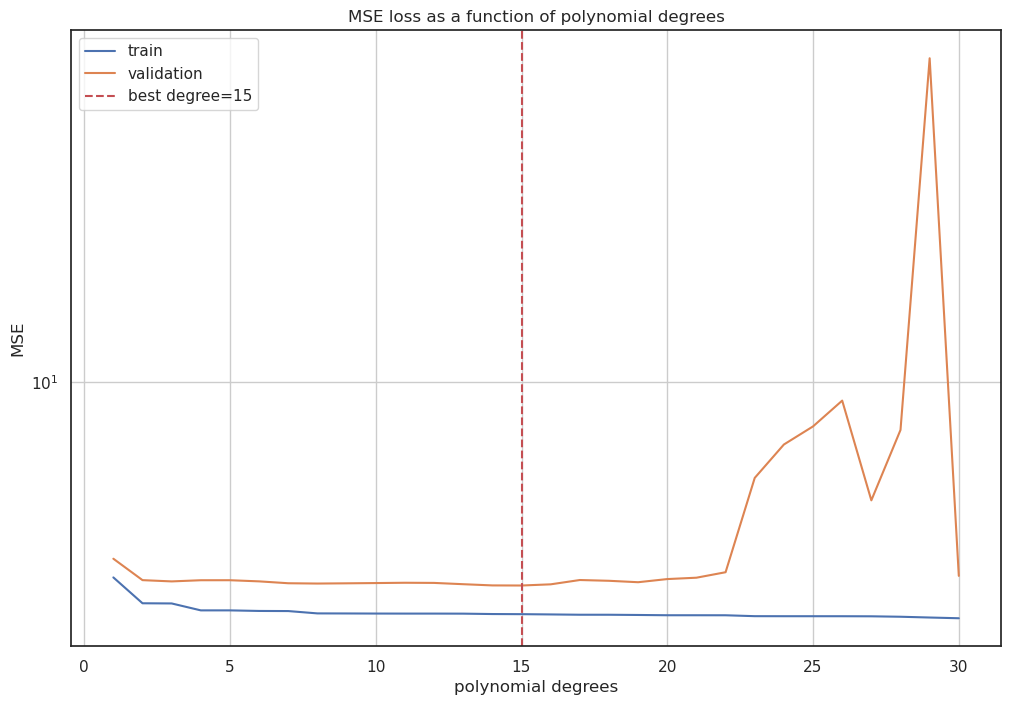

In [44]:
# Find best degree by looking up minimum MSE and corresponding index in degree
best_idx = np.argmin(val_mses)
best_degree = degree[best_idx]

plt.figure(figsize=(12, 8))
plt.plot(degree, train_mses, label='train')
plt.plot(degree, val_mses, label='validation')
plt.yscale("log")
plt.axvline(best_degree, c='r', ls='--', label=rf'best degree={best_degree}')
plt.xlabel(r'polynomial degrees')
plt.ylabel('MSE')
plt.title('MSE loss as a function of polynomial degrees')
plt.legend();
plt.grid()
plt.show()

In [45]:
print(f'The validation error is lowest at degree {best_degree}, with MSE value of {min(val_mses)}')

The validation error is lowest at degree 15, with MSE value of 2.880190430645948


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.4</b></div>

Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). 

Append a new dictionary to your `results` list for this model.

_Points:_ 3

In [46]:
def polynomial_regression(poly_degree):
    poly = PolynomialFeatures(degree=poly_degree, interaction_only=False, include_bias=include_bias)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    # make into DataFrame
    x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())
    x_poly_test_df = pd.DataFrame(x_poly_test, columns=poly.get_feature_names_out())
    
    # Fit a linear regression model
    poly_reg = LinearRegression(fit_intercept=fit_intercept)
    poly_reg.fit(x_poly_train_df, y_train)
    
    # predict values
    y_train_pred = poly_reg.predict(x_poly_train_df)
    y_test_pred = poly_reg.predict(x_poly_test_df)

    #Compute the MSE of the model
    lin_train_mse = mean_squared_error(y_train, y_train_pred)
    lin_test_mse = mean_squared_error(y_test, y_test_pred)
    #Compute the R-squared of the model
    lin_train_r2 = r2_score(y_train, y_train_pred)
    lin_test_r2 = r2_score(y_test, y_test_pred)
    
#     print("Linear regression model results:\n")
#     print(
#         "\tTrain MSE\t{:.4f}\n"
#         "\tTest MSE\t{:.4f}\n".format(
#             lin_train_mse,
#             lin_test_mse,
#         )
#     )

#     print(f"\tTest R-squared\t{lin_test_r2:.4f}")
    
    return poly_reg, x_poly_train, x_poly_train_df, x_poly_test, x_poly_test_df, lin_train_mse, lin_test_mse, lin_train_r2, lin_test_r2

In [47]:
best_degree

15

In [48]:
lr_model, lr_train, lr_train_df, lr_test, lr_test_df, lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2 = polynomial_regression(best_degree)

In [49]:
results.append({'model':'3.4', 'train_mse': lr_train_mse, 'test_mse': lr_test_mse})
results

[{'model': '2.2',
  'train_mse': 2.6534065590397877,
  'test_mse': 2.6519056545149606},
 {'model': '3.4',
  'train_mse': 2.4909456088704314,
  'test_mse': 2.7364825064097213}]

In [50]:
r2_list.append({'model':'3.4', 'train_r2': lr_train_r2, 'test_r2': lr_test_r2})
r2_list

[{'model': '2.2',
  'train_r2': 0.5867787520509838,
  'test_r2': 0.6159435977872276},
 {'model': '3.4',
  'train_r2': 0.6120791781554019,
  'test_r2': 0.6036949412809594}]

In [51]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.5</b></div>

Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

_Points:_ 2

Model Q3.4's trendline from 15 degrees of polynomials lead to more curves than the regression curve in Q2.3. Model Q3.4's curves attempt to fit the most datapoints, and results in a higher training r^2 than model Q2.3. However, it's lower test r2 than train r2 suggests that this model is overfitted.

In [52]:
# Print r_squared
pd.DataFrame(r2_list)

,model,train_r2,test_r2
0,2.2,0.586779,0.615944
1,3.4,0.612079,0.603695


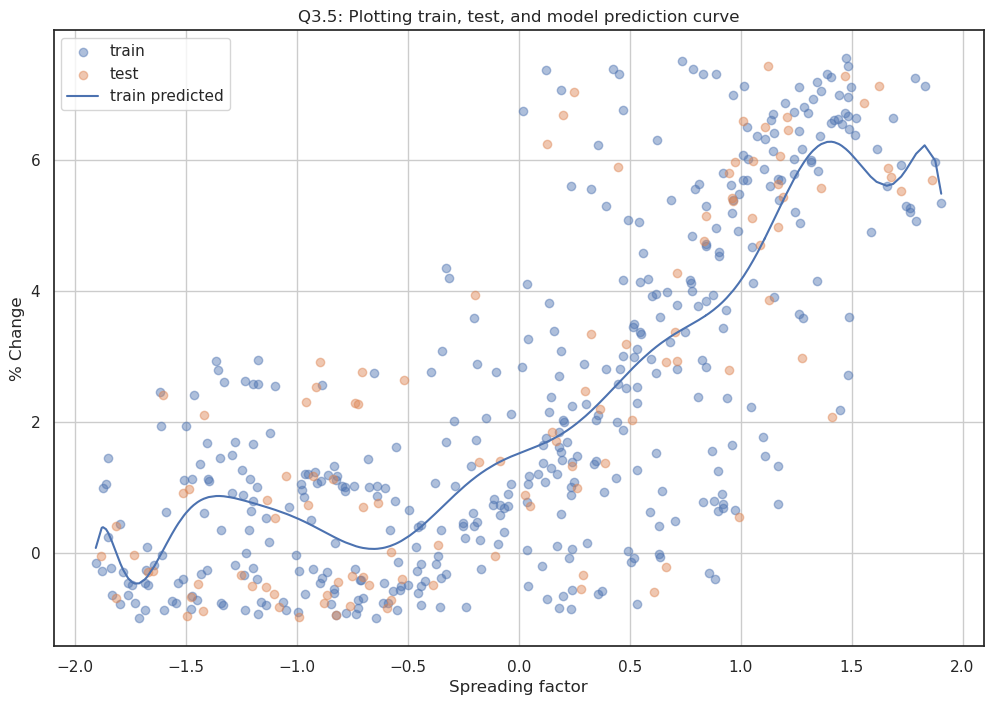

In [53]:
# Plot model from training set (guesstimated model)
plot_model('3.5', lr_model, lr_train, lr_train_df)   

<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation. Note that `cross_validation` should be passed *all* training examples (*not* the 80% split from the previous question).

- Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ for each polynomial regression from **degree 1 to 30 (inclusive)**.
- For each degree:
    - store the mean train MSE across all $k$ folds in the list `train_mses_mean`
    - store the mean validation MSE across all $k$ folds in the list `val_mses_mean`
    - store the standard deviation  of the validation MSE across all $k$ folds in the list `val_mses_std`
    

_Points:_ 4

In [54]:
k = 10

In [55]:
# initialize a list of numbers 1:30
degree = np.arange(1, 31)

In [56]:
def polynomial_regression_with_cross_validation(n):
    train_mses_mean, val_mses_mean, val_mses_std = [], [], []
    
    for i in degree:
        poly = PolynomialFeatures(degree=i, interaction_only=False, include_bias=include_bias)
        x_poly_train = poly.fit_transform(x_train)

        # make into DataFrame
        x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())

        # Fit a linear regression model
        poly_reg = LinearRegression(fit_intercept=fit_intercept)
        poly_reg.fit(x_poly_train_df, y_train)

        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Remember to get the train_score
        poly_reg_cv = cross_validate(poly_reg, x_poly_train, y_train, cv=n, 
                    scoring=('neg_mean_squared_error'), return_train_score=True)

        # print(linreg_cv)

        # Compute the training and validation errors got after cross validation
        mse_train = -np.mean(poly_reg_cv['train_score'])
        mse_val = -np.mean(poly_reg_cv['test_score'])
        std_val = np.std(poly_reg_cv['test_score'])

        # Append the MSEs to their respective lists 
        train_mses_mean.append(mse_train)
        val_mses_mean.append(mse_val)
        val_mses_std.append(std_val)
    
    # Return the train and validation MSE
    return train_mses_mean, val_mses_mean, val_mses_std

train_mses_mean, val_mses_mean, val_mses_std = polynomial_regression_with_cross_validation(k)

In [57]:
len(train_mses_mean), len(val_mses_mean), len(val_mses_std)

(30, 30, 30)

In [58]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.2 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

_Points:_ 4

As polynomial degree increases, the training MSE steadily decreases, at the cost of increasing, and eventually large fluctuations, validation MSE, which suggests overfitting at higher degrees. Note that higher MSE's lead to larger MSE std devs > 20. The best degree chosen by the lowest validation MSE is 8, higher than our guesstimate, but lower than the single validation set.

In [59]:
val_mses_mean[:5]

[3.1210545089333666,
 2.6973468049700733,
 2.69925396875393,
 2.6223667883319557,
 2.6299637455757994]

In [60]:
print(f'The validation error is lowest at degree {best_degree}, with MSE value of {min(val_mses_mean)}')

The validation error is lowest at degree 15, with MSE value of 2.5990753511998625


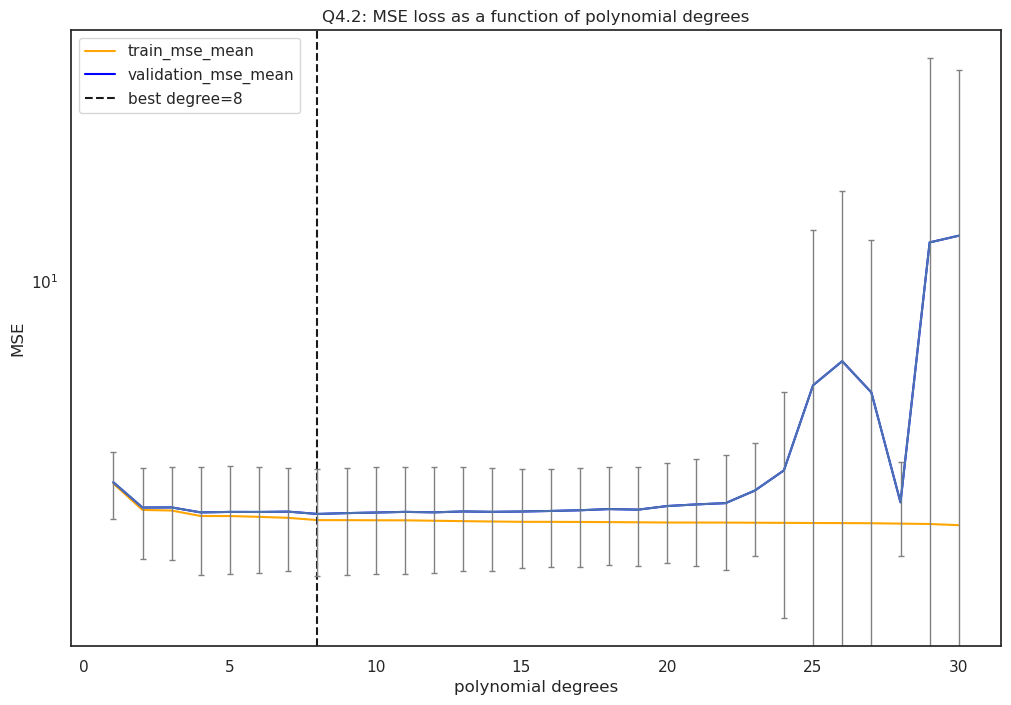

In [61]:
best_idx = np.argmin(val_mses_mean)
best_degree = degree[best_idx]

# Plotting training and testing dataset with regression line
plt.figure(figsize=(12,8))
plt.plot(degree, train_mses_mean, label='train_mse_mean', color='orange')
plt.plot(degree, val_mses_mean, label='validation_mse_mean', color='blue')
plt.yscale("log")
plt.axvline(best_degree, c='k', ls='--', label=rf'best degree={best_degree}')
plt.xlabel(r'polynomial degrees')
plt.ylabel('MSE')
plt.title('Q4.2: MSE loss as a function of polynomial degrees')
plt.legend()
plt.errorbar(degree, val_mses_mean, yerr=val_mses_std, ecolor='grey', elinewidth=1, capsize=2.5)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Fit the best model based on the entire training data and report the $MSE$.


- For the best degree polynomial regression identified in Question 4.2 above, train on the complete training data and predict on the test data.
- Append a new dictionary for this model to the `results` list. 

_Points:_ 4

In [62]:
cv_model, cv_train, cv_train_df, cv_test, cv_test_df, cv_train_mse, cv_test_mse, cv_train_r2, cv_test_r2 = polynomial_regression(best_degree)

In [63]:
results.append({'model':'4.3', 'train_mse': cv_train_mse, 'test_mse': cv_test_mse})
results

[{'model': '2.2',
  'train_mse': 2.6534065590397877,
  'test_mse': 2.6519056545149606},
 {'model': '3.4',
  'train_mse': 2.4909456088704314,
  'test_mse': 2.7364825064097213},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353012}]

In [64]:
r2_list.append({'model':'4.3', 'train_r2': cv_train_r2, 'test_r2': cv_test_r2})
r2_list

[{'model': '2.2',
  'train_r2': 0.5867787520509838,
  'test_r2': 0.6159435977872276},
 {'model': '3.4',
  'train_r2': 0.6120791781554019,
  'test_r2': 0.6036949412809594},
 {'model': '4.3',
  'train_r2': 0.6087197434055087,
  'test_r2': 0.6215764830785235}]

In [65]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

- Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)).
- Display the coefficients of your model.
- Display `results` as a DataFrame (there should now be 3 entries).
- Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

_Points:_ 2

Model Q4.3 has lower degrees and a higher train MSE than Model Q3.4 and a higher train MSE. Despite this, Model Q4.3's test r^2 is higher than Model Q3.4, which means model Q4.3 generalizes better in the testing dataset.

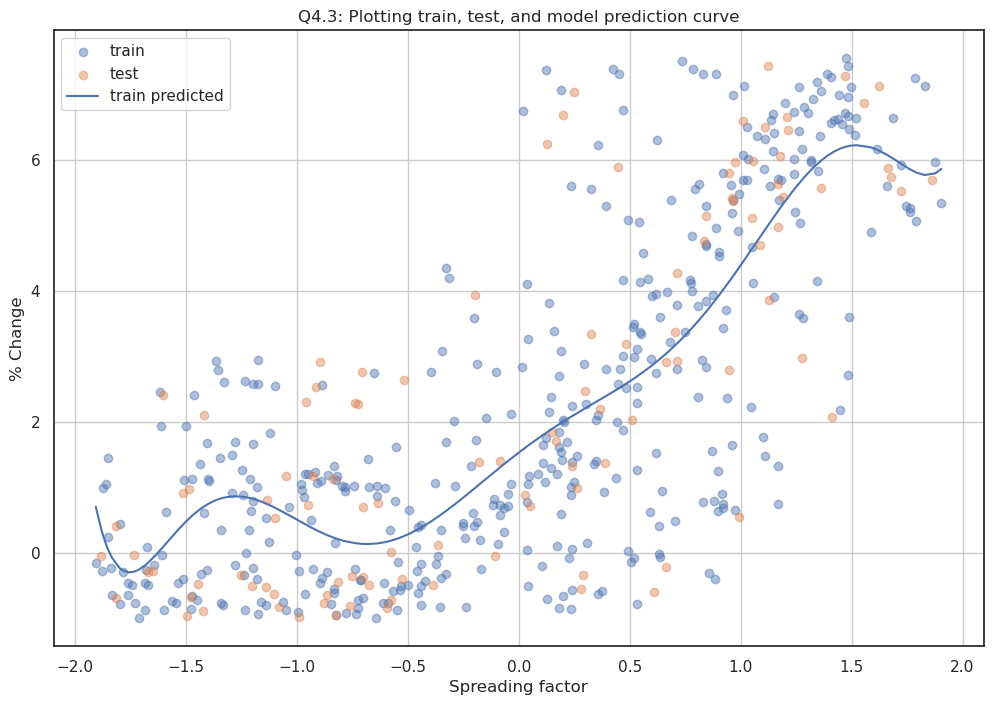

In [66]:
# Plot model from training set (guesstimated model)
plot_model('4.3', cv_model, cv_train, cv_train_df)  

In [67]:
# create a results dataframe by combining the features names with the coefficients
print(f'Intercept: {cv_model.intercept_:.3}')
results_coef = pd.DataFrame(zip(cv_test_df.columns, cv_model.coef_), columns=['feature', 'coeff'])
results_coef

Intercept: 1.54


,feature,coeff
0,Spreading_factor,2.597028
1,Spreading_factor^2,-1.094868
2,Spreading_factor^3,-1.189134
3,Spreading_factor^4,3.483149
4,Spreading_factor^5,0.652877
5,Spreading_factor^6,-1.713008
6,Spreading_factor^7,-0.115305
7,Spreading_factor^8,0.240418


In [68]:
# print results as dataframe
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.653407,2.651906
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011


In [69]:
# print r2
pd.DataFrame(r2_list)

,model,train_r2,test_r2
0,2.2,0.586779,0.615944
1,3.4,0.612079,0.603695
2,4.3,0.608720,0.621576


<!-- END QUESTION -->

<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.1</b></div>

In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.4](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation.

- Similar to Question 2.4, **use 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ *for each polynomial regression* of **degrees 1 to 30 (inclusive)**.
  - Select the best degree polynomial based on the lowest mean cross-validation MSE and store this degree in a list called `best_degrees`.
- After completing your bootstraps, `best_degrees` should have 100 elements, one degree for each completed bootstrap.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

_Points:_ 4

In [70]:
# number of k-fold
k = 10

# # of bootstraps
n_boots = 100

# initialize a list of numbers 1:30
degree = np.arange(1, 31)
degree

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [71]:
def polynomial_bootstrap_cv_regression(X_train, degrees, n_bootstrap, n_k):
    # Initialize variables
    best_degrees = [] # best_degree, train_mse, test_mse, 95% CI, train_r2, test_r2
    best_models = []
    
    for i in range(n_bootstrap):
        # print(i)
        # Lists to save models and coefficients
        boot_models = []
        boot_betas = []
        train_mses_mean, val_mses_mean, val_mses_std = [], [], []

        for d in degrees:
            # get polynomial features
            poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=include_bias)
            x_poly_train = poly.fit_transform(x_train)

            # make into DataFrame
            x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())

            # Create bootstrapping datasets
            boot_i = np.random.choice(x_poly_train_df.index, 
                                      replace = True, 
                                      size = len(x_poly_train_df.index))

            # Create bootstrap datasets
            X_train_boot = x_poly_train_df.iloc[boot_i,:]
            y_train_boot = y_train.iloc[boot_i]
            
            # Fit a linear regression model
            boot_linreg = LinearRegression(fit_intercept=fit_intercept).fit(X_train_boot, y_train_boot)

            # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=k=10. Remember to get the train_score
            boot_linreg_cv = cross_validate(boot_linreg, X_train_boot, y_train_boot, cv=n_k, 
                        scoring=('neg_mean_squared_error'), return_train_score=True, return_estimator=True)
            
            boot_models.append(boot_linreg_cv)
            
            # get coefficients
            coefs = [boot_linreg.intercept_]
            [coefs.append(coef) for coef in boot_linreg.coef_]
        
            boot_betas.append(coefs)
            
            # Compute the training and validation errors got after cross validation
            mse_train = -np.mean(boot_linreg_cv['train_score'])
            mse_val = -np.mean(boot_linreg_cv['test_score'])
            std_val = np.std(boot_linreg_cv['test_score'])

            # Append the MSEs to their respective lists 
            train_mses_mean.append(mse_train)
            val_mses_mean.append(mse_val)
            val_mses_std.append(std_val)
        
        # cHOOSE best degree
        best_idx = np.argmin(val_mses_mean)
        best_degree = degree[best_idx]
        
        # from best degree, get model details
        # best_degree, train_mse, test_mse
        # best_models.append([best_model, best_degree, best_train_mse, best_test_mse, best_test_std, best_coefs])
        best_models.append([boot_models[best_idx], degree[best_idx], 
                            train_mses_mean[best_idx], val_mses_mean[best_idx], 
                            val_mses_std[best_idx], boot_betas[best_idx]])
        best_degrees.append(int(best_degree)) 
        # print(f"best: {best_degree}")
    
    return best_degrees, best_models

In [72]:
best_degrees, best_models = polynomial_bootstrap_cv_regression(x_train, degree, n_boots, k)
# best_degrees

In [73]:
best_degrees = [int(i) for i in best_degrees]
best_degrees[:10]

[2, 10, 13, 16, 19, 14, 6, 14, 14, 12]

In [74]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

Generate a well-labeled bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the `best_degrees` saved during your bootstraps.

_Points:_ 4

In [75]:
len(best_degrees), best_degrees[:5]

(100, [2, 10, 13, 16, 19])

In [76]:
# Initialize list of values for x = degrees = 1 - 30
X = np.arange(1, 31)

# Count frequency of best degrees
y = [0 for i in X]
for i in best_degrees:
    y[i-1] = y[i-1]+1


In [77]:
X[:5], y[:5]

(array([1, 2, 3, 4, 5]), [0, 2, 0, 1, 7])

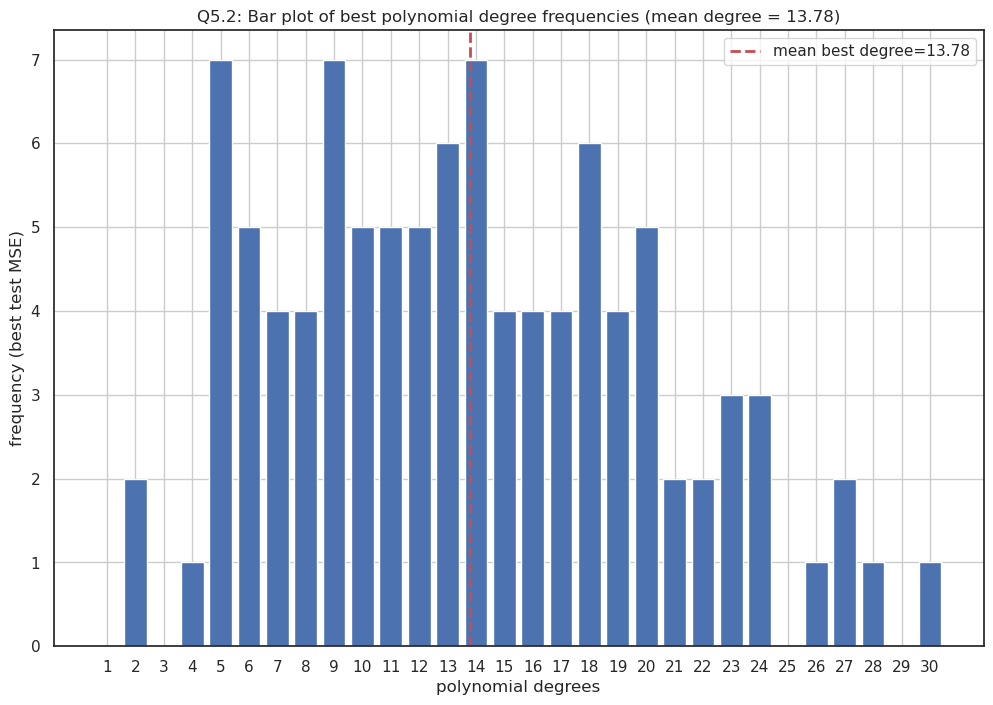

In [78]:
# plot histogram of polynomial degrees frequencies
plt.figure(figsize=(12,8))
plt.bar(X, y)
plt.ylabel('frequency (best test MSE)', fontsize=12)
plt.xticks(ticks=X, labels=X)
plt.xlabel('polynomial degrees', fontsize=12)
plt.axvline(x = np.mean(best_degrees), color='r', linewidth = 2, linestyle = "--", label=rf'mean best degree={np.mean(best_degrees)}')
plt.title(f'Q5.2: Bar plot of best polynomial degree frequencies (mean degree = {np.mean(best_degrees)})')
plt.legend()
plt.grid()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.3</b></div>

What are your observations from the plot above? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

_Points:_ 3

There could be biases in datapoint distribution from the bootstrapping with-replacement, which would skew the model coefficients, MSEs, and predictive power. For example, a bootstrapped dataset could contain abnormally high outliers, or contain a lot of similar datapoints (biased sampling). Without a random_state specified, different best_degrees - degrees with highest frequency deemed as best - are chosen.

I would choose the below degree with the highest frequency. 

In [79]:
best_idx = np.argmax(y)
best_degree = X[best_idx]
q5_best_degree = best_degree

In [80]:
print(f'The overall best degree chosen based on bootstrapped results is polynomial degree {np.max(best_degree)} with a frequency of {np.max(y)}')

The overall best degree chosen based on bootstrapped results is polynomial degree 5 with a frequency of 7


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.4</b></div>

Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Append a new dictionary for this model to your `results` list. 

_Points:_ 3

In [81]:
boot_model, boot_train, boot_train_df, boot_test, boot_test_df, boot_train_mse, boot_test_mse, boot_train_r2, boot_test_r2 = polynomial_regression(best_degree)

In [82]:
results.append({'model':'5.4', 'train_mse': boot_train_mse, 'test_mse': boot_test_mse})
results

[{'model': '2.2',
  'train_mse': 2.6534065590397877,
  'test_mse': 2.6519056545149606},
 {'model': '3.4',
  'train_mse': 2.4909456088704314,
  'test_mse': 2.7364825064097213},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353012},
 {'model': '5.4',
  'train_mse': 2.570848674503198,
  'test_mse': 2.598743252707505}]

In [83]:
r2_list.append({'model':'5.4', 'train_r2': boot_train_r2, 'test_r2': boot_test_r2})

In [84]:
r2_list

[{'model': '2.2',
  'train_r2': 0.5867787520509838,
  'test_r2': 0.6159435977872276},
 {'model': '3.4',
  'train_r2': 0.6120791781554019,
  'test_r2': 0.6036949412809594},
 {'model': '4.3',
  'train_r2': 0.6087197434055087,
  'test_r2': 0.6215764830785235},
 {'model': '5.4',
  'train_r2': 0.5996356857010559,
  'test_r2': 0.6236427256715096}]

In [85]:
grader.check("q5.4")

q5.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.5</b></div>

- Generate a plot of the data and your regression curve.
- Display `results` as a DataFrame.
- Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

_Points:_ 2

The train MSE for model Q5.5 is lower than model Q4.3, but model Q5.5 test MSE is slightly higher. Overall, considering the MSEs and test r^2, the model from bootstrapping (Q5.5) is slightly worse than model Q4.3. It seems like adding bootstrapping on top of cross-validation only resulted in a marginal change.

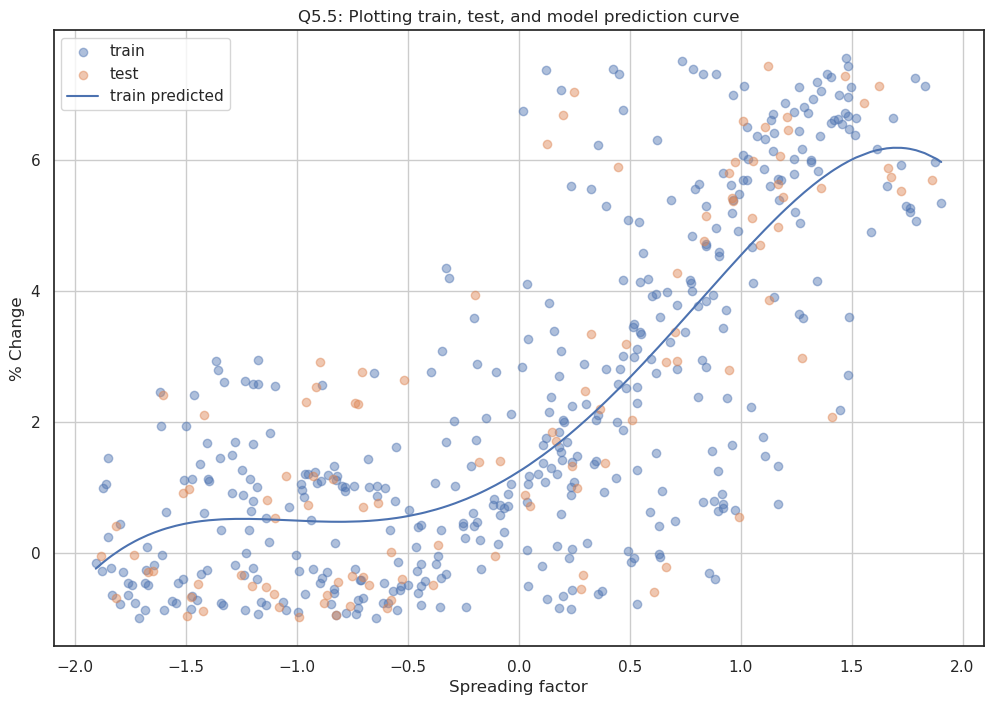

In [86]:
# Plot model from training set (guesstimated model)
plot_model('5.5', boot_model, boot_train, boot_train_df)  

In [87]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.653407,2.651906
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.570849,2.598743


In [88]:
pd.DataFrame(r2_list)

,model,train_r2,test_r2
0,2.2,0.586779,0.615944
1,3.4,0.612079,0.603695
2,4.3,0.608720,0.621576
3,5.4,0.599636,0.623643


<!-- END QUESTION -->

<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to and including* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.1</b></div>

**Find the best hyper-parameter alpha, $\alpha$**

Use the `LassoCV` estimator to find the best regularization parameter from $\alpha \in [10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}]$
- Store the mean cross-validation MSEs across each fold in `lassoCV_val_mses_mean`
- Save the best $\alpha$ based on the mean cross-validation MSE in `best_alpha`

You should read the documentation for [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Some important information about this estimator:
- After calling `fit`, the model is now the one fit on the entire training data using the best alpha based on the mean CV MSE.
- the `mse_path_` attribute contains the validation scores on each fold for each candidate alpha.
- the `alpha_` attribute contains the best regularization parameter found through cross-validation

**Tips:** You should try adjusting `LassoCV`'s `max_iter` argument to prevent convergence warnings. If you are unable to prevent them with a large number of iterations (~100,000) then you can silence them with:
```{python}
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
```
Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.

_Points:_ 5

In [89]:
alphas = [1e-5,1e-4, 1e-3, 0.01, 0.1]
degrees = 30
k =10

In [90]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def polynomial_lassocv_regression(degrees, alphas, n_k):
    lassoCV_val_mses_mean = []
    lassoCV_val_mses_std = []
    best_alphas = []
    coefs_list = []
    
    for a in alphas:
    # get polynomial features
        poly = PolynomialFeatures(degree=degrees, interaction_only=False, include_bias=include_bias)
        x_poly_train = poly.fit_transform(x_train)

        # make into DataFrame
        x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())

        # Initialize lassoCV regression model
        lassoCV_reg = LassoCV(alphas=[a], cv=n_k)

        # fit on training dataset
        lassoCV_reg.fit(x_poly_train_df, y_train)

        print(np.mean(lassoCV_reg.mse_path_))
        print(lassoCV_reg.alpha_)
        
 
        # get coefficients
        coefs = [lassoCV_reg.intercept_]
        [coefs.append(coef) for coef in lassoCV_reg.coef_]

        lassoCV_val_mses_mean.append(np.mean(lassoCV_reg.mse_path_))
        lassoCV_val_mses_std.append(np.std(lassoCV_reg.mse_path_))
        best_alphas.append(lassoCV_reg.alpha_)
        coefs_list.append(coefs)
    
    # find best alpha based on lowest mean val_mse
    best_idx = np.argmin(lassoCV_val_mses_mean)
    best_alpha = best_alphas[best_idx]
    
    return lassoCV_val_mses_mean, lassoCV_val_mses_std, best_alpha, coefs_list

lassoCV_val_mses_mean, lassoCV_val_mses_std, best_alpha, coefs = polynomial_lassocv_regression(degrees, alphas, k)

2.601244996646613
1e-05
2.601042151498547
0.0001
2.599174887811769
0.001
2.587273139414454
0.01
2.6447261828660347
0.1


In [91]:
len(coefs)

5

In [92]:
for c in coefs:
    print(len(c))

31
31
31
31
31


In [93]:
lassoCV_val_mses_mean, best_alpha

([2.601244996646613,
  2.601042151498547,
  2.599174887811769,
  2.587273139414454,
  2.6447261828660347],
 0.01)

In [94]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.2</b></div>

Generate two plots:
- One showing the mean validation $MSE$ values for each regularization parameter $\alpha$, identifying the best $\alpha$.
- Another showing the values for each of the model's coefficients. 

_Points:_ 5

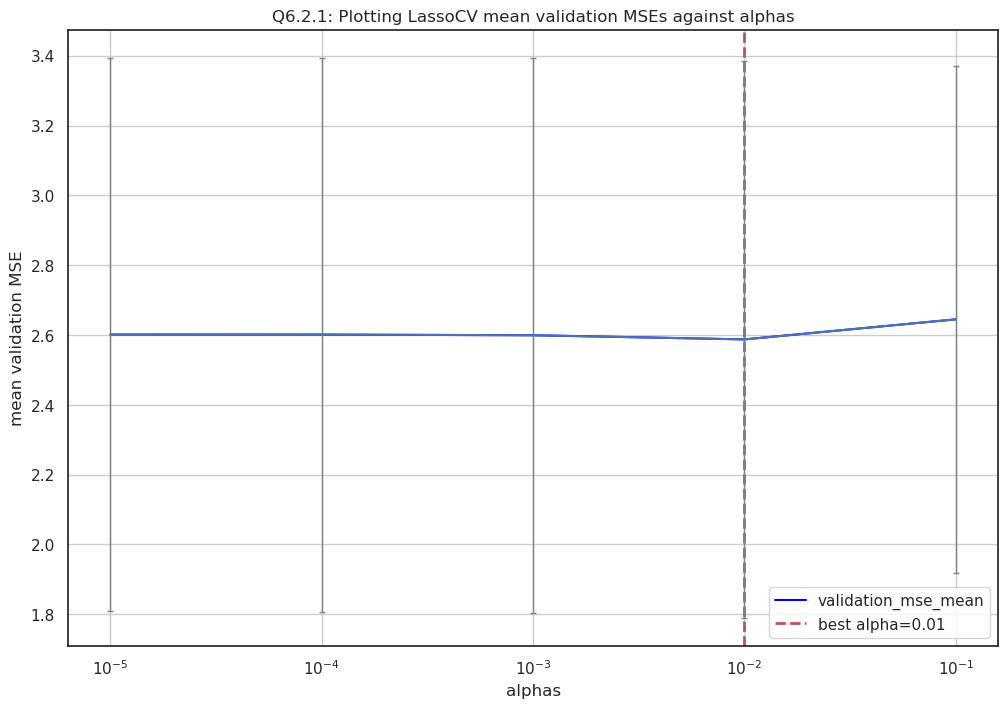

In [95]:
# Plot mean validation MSE for each reg parameter

plt.figure(figsize=(12,8))
# plt.plot(degree, train_mses_mean, label='train_mse_mean', color='orange')
plt.plot(alphas, lassoCV_val_mses_mean, label='validation_mse_mean', color='blue')
plt.xscale("log")
plt.axvline(best_alpha, c='r',linewidth = 2, ls='--', label=rf'best alpha={best_alpha}')
plt.xlabel(r'alphas')
plt.ylabel('mean validation MSE')
plt.title('Q6.2.1: Plotting LassoCV mean validation MSEs against alphas')
plt.grid()
plt.legend()
plt.errorbar(alphas, lassoCV_val_mses_mean, yerr=lassoCV_val_mses_std, ecolor='grey', elinewidth=1, capsize=2.5)
plt.show()

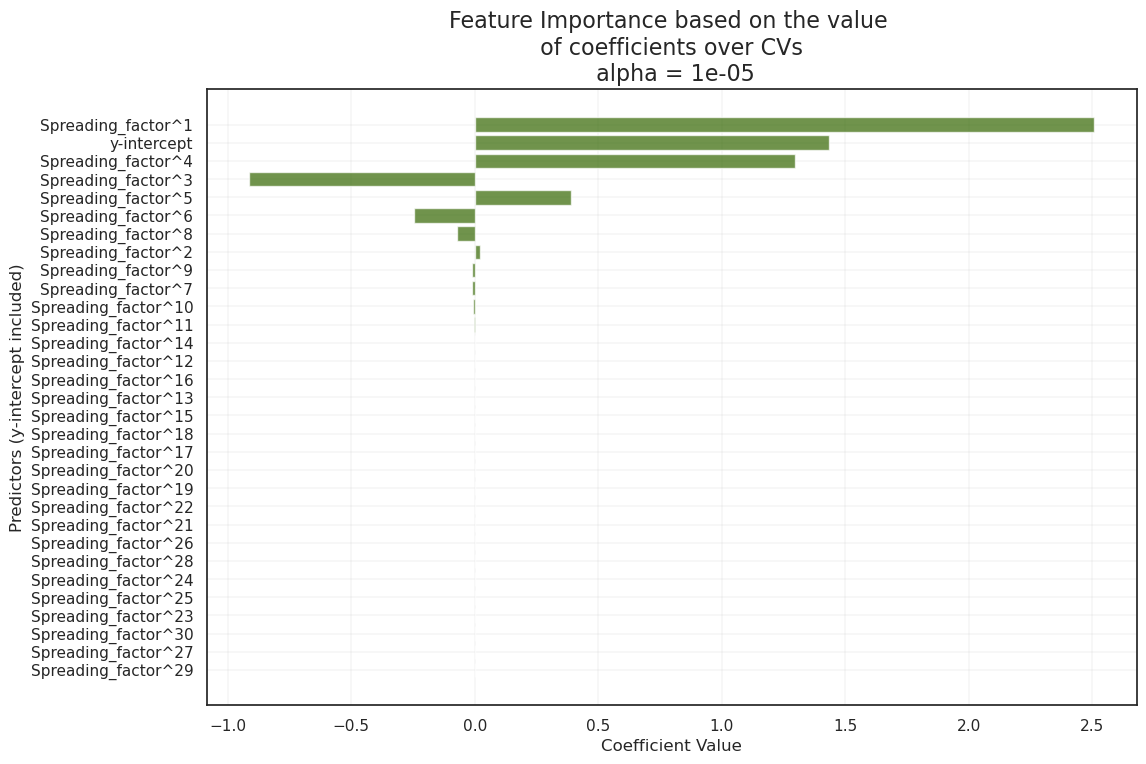

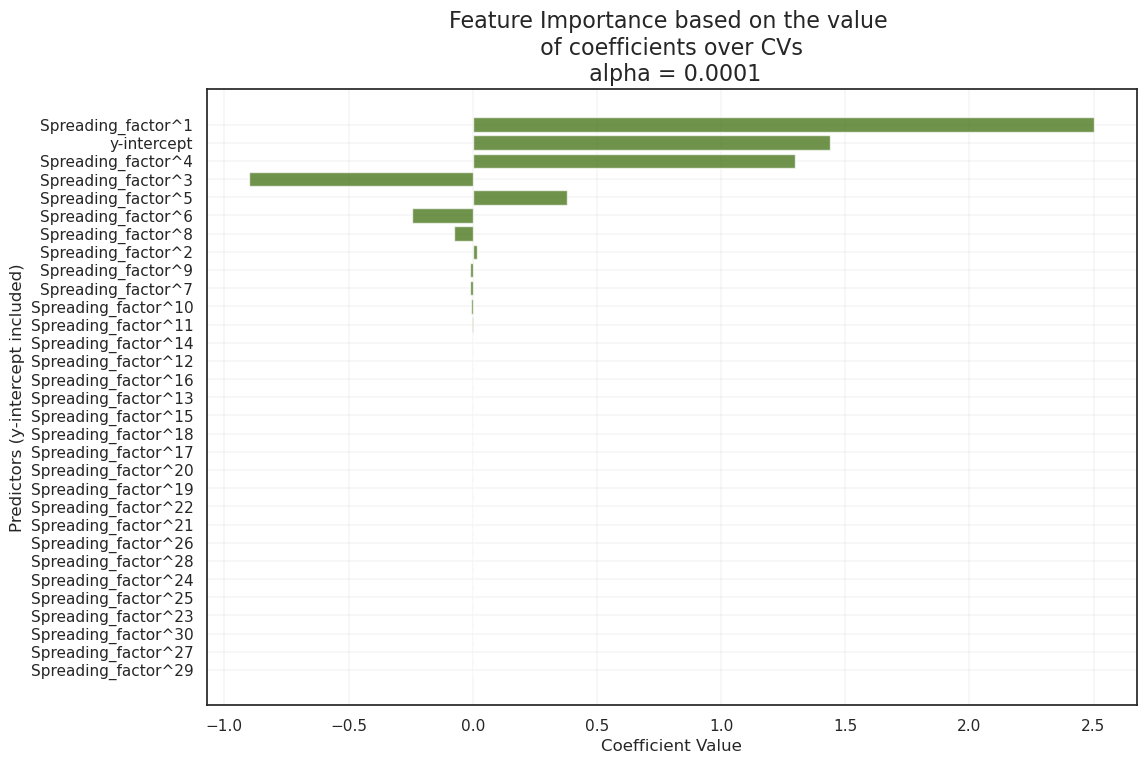

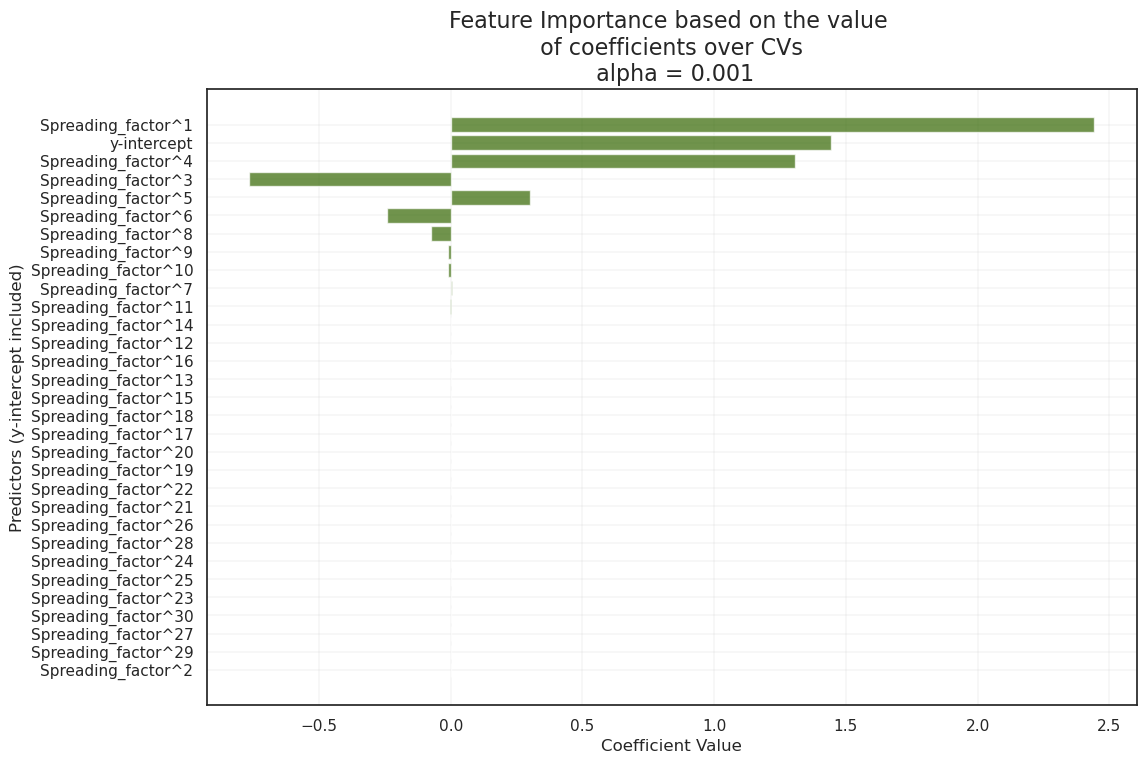

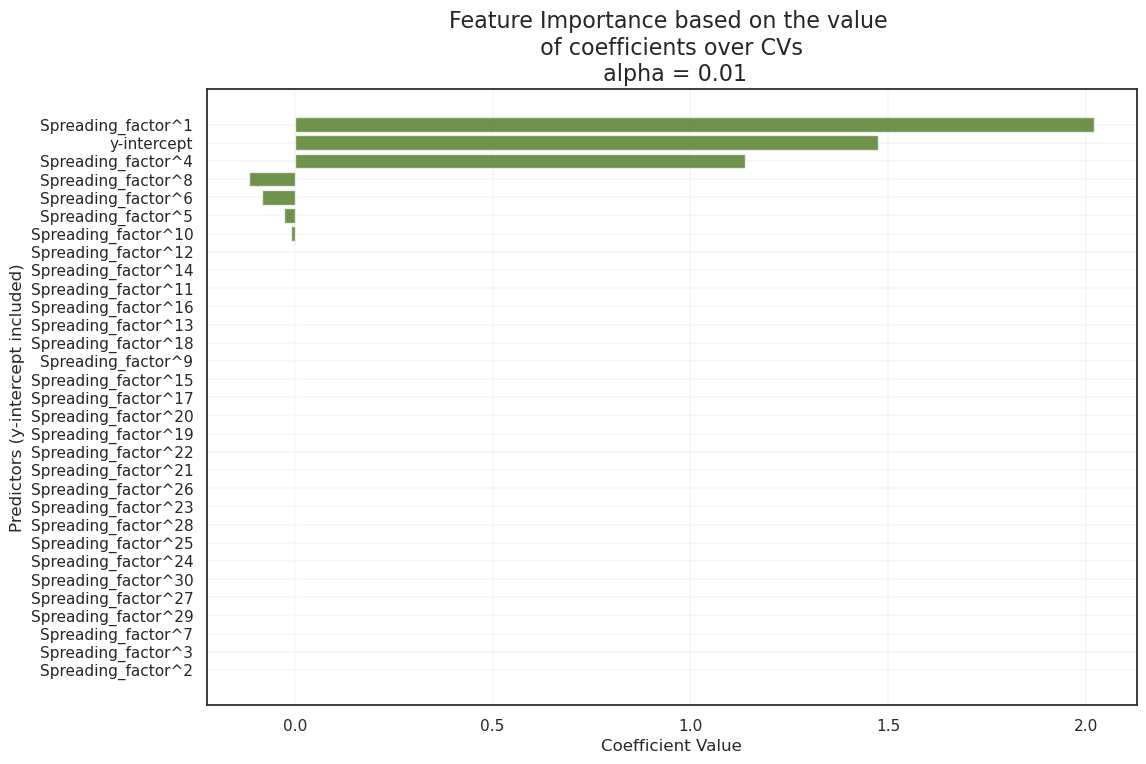

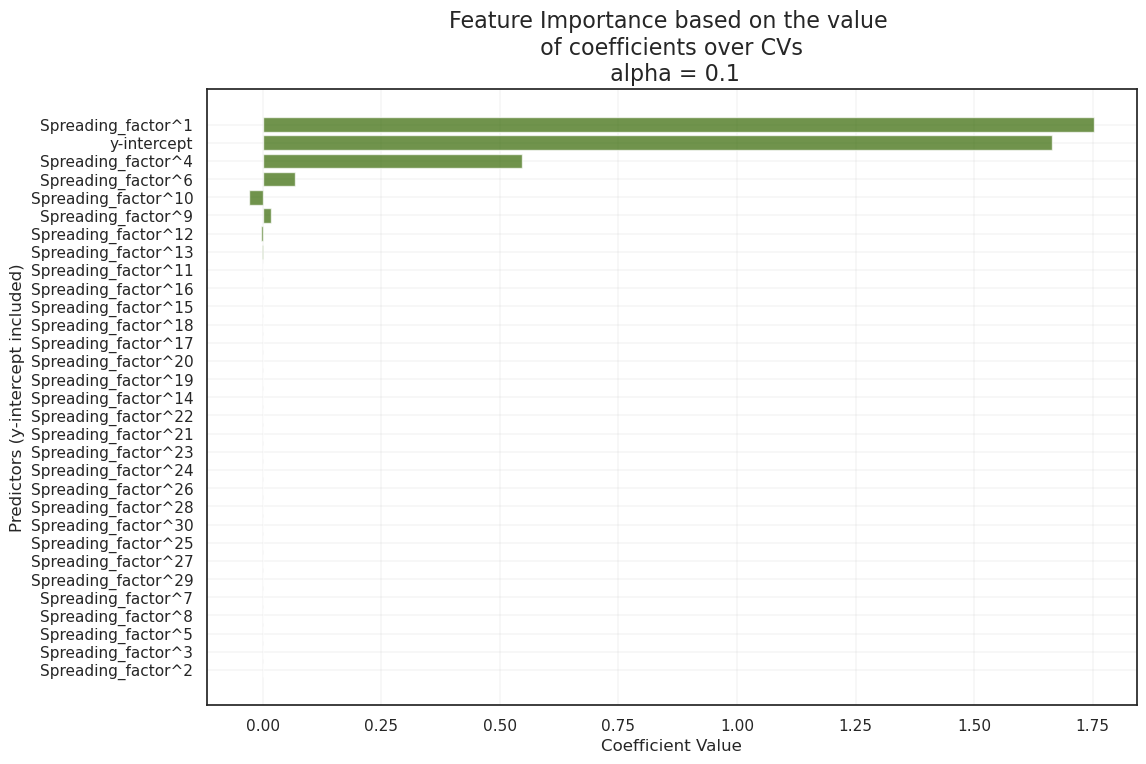

In [96]:
# Plot coefficientgs for every alpha value
x = [f"Spreading_factor^{i}" for i in range(31)]
x[0] = "y-intercept"

for i, c in enumerate(coefs):
    
    # processing data for axes
    k = [abs(n) for n in c] # get abs value of coefficients for sorting
    
    # zip and make df of degree (x), coefficients (c), and abs coefficient (k)
    coef_list = list(zip(x, c, k))
    coef_df = pd.DataFrame(coef_list, columns=["Predictor", "Coefficient Value", "Key"])
    
    # sort df in ascending order of absolute coefficient value
    coef_df = coef_df.sort_values(by=["Key"], ascending=True)
    
    fig, ax = plt.subplots(figsize = (12,8))    
    ax.barh(coef_df["Predictor"], coef_df["Coefficient Value"], align='center', color="#336600", alpha=0.7)
    ax.grid(linewidth=0.2)
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Predictors (y-intercept included)')
    ax.set_title(f'Feature Importance based on the value \n of coefficients over CVs \n alpha = {alphas[i]}', fontsize=16)
    plt.show()
    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.3</b></div>

**Find the most significant degrees**

**NOTE: The code for this question has been provided. It can take several minutes to run. Just be sure to answer the interpretation part of the question.**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

_Points:_ 5

In [97]:
max_degree = 30
max_iter = 100000

In [98]:
# Set bootstrapping parameters
numboot = 100

# Create empty dictionary for storing results
significant_degrees = {}

# Perform bootstraps
df_train = pd.read_csv('data/bacteria_train.csv')
for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True, random_state=109)
    x_train_boot = df_boot[["Spreading_factor"]]
    x_poly_train = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train_boot)
    y_train_boot = df_boot.Perc_population

    lasso = Lasso(
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        alpha=best_alpha,
    )
    lasso.fit(x_poly_train, y_train_boot)
    
    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients)>0.1)[0]:
        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

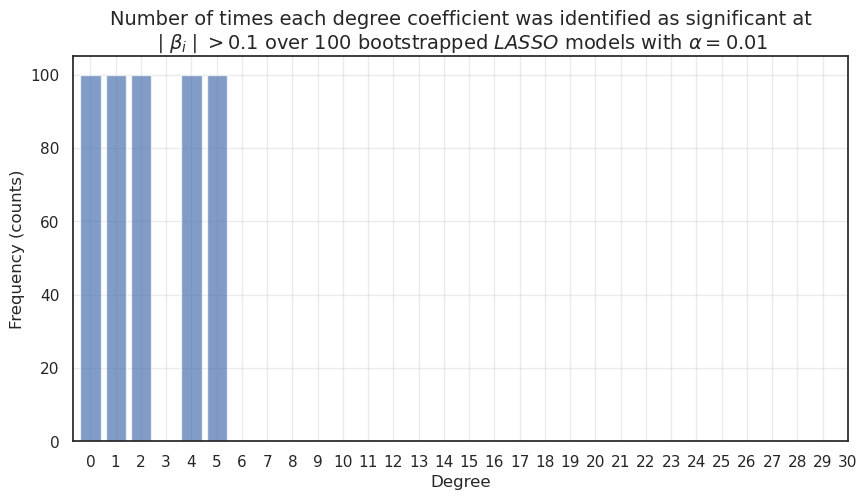

In [99]:
fig, ax = plt.subplots(figsize=(10,5))

lists = sorted(significant_degrees.items())

x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(max_degree+1))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)

In [100]:
x

(0, 1, 2, 4, 5)

In [101]:
# the best degree for Q6.3 is the highest degree with at least 1 count in the above plot
q6_best_degree = x[-1]
print(f"the best degree chosen by 6.3 is: {q6_best_degree}")

the best degree chosen by 6.3 is: 5


The bar plot shows the frequency that a polynomial degree coefficient has an aboslute value >0.1, indicating that it has a relationship with the response variable, with 0 = no relationship. Only polynomials up to the above degree shown by q6_best_degree were significant to the model, with no degrees above it having a relationship with response variable. q6_best_degree is therefore chosen as a maximum degree polynomial.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.4</b></div>

From our Question 6.3 results, we can see that only some degrees are consistently significant over many bootstraps.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.3 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Append a new dictionary for this model to your `results` list.

_Points:_ 6

In [102]:
def polynomial_lasso_regression(poly_degree, best_alpha):
    
    poly = PolynomialFeatures(degree=poly_degree, interaction_only=False, include_bias=include_bias)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    # make into DataFrame
    x_poly_train_df = pd.DataFrame(x_poly_train, columns=poly.get_feature_names_out())
    x_poly_test_df = pd.DataFrame(x_poly_test, columns=poly.get_feature_names_out())
    
    lasso_reg = Lasso(
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        alpha=best_alpha,
    )
    
    lasso_reg.fit(x_poly_train_df, y_train)
    
    # predict values
    y_train_pred = lasso_reg.predict(x_poly_train_df)
    y_test_pred = lasso_reg.predict(x_poly_test_df)

    #Compute the MSE of the model
    lin_train_mse = mean_squared_error(y_train, y_train_pred)
    lin_test_mse = mean_squared_error(y_test, y_test_pred)
    #Compute the R-squared of the model
    lin_train_r2 = r2_score(y_train, y_train_pred)
    lin_test_r2 = r2_score(y_test, y_test_pred)
    
    return lasso_reg, x_poly_train, x_poly_train_df, x_poly_test, x_poly_test_df, lin_train_mse, lin_test_mse, lin_train_r2, lin_test_r2

In [103]:
lasso_model, lasso_train, lasso_train_df, lasso_test, lasso_test_df, lasso_train_mse, lasso_test_mse, lasso_train_r2, lasso_test_r2 = polynomial_lasso_regression(q6_best_degree, best_alpha)

In [104]:
results.append({'model':'6.4', 'train_mse':lasso_train_mse, 'test_mse': lasso_test_mse})
results

[{'model': '2.2',
  'train_mse': 2.6534065590397877,
  'test_mse': 2.6519056545149606},
 {'model': '3.4',
  'train_mse': 2.4909456088704314,
  'test_mse': 2.7364825064097213},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353012},
 {'model': '5.4',
  'train_mse': 2.570848674503198,
  'test_mse': 2.598743252707505},
 {'model': '6.4',
  'train_mse': 2.573783599904434,
  'test_mse': 2.59599353135551}]

In [105]:
r2_list.append({'model':'6.4', 'train_r2': lasso_train_r2, 'test_r2': lasso_test_r2})

In [106]:
grader.check("q6.4")

q6.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.5</b></div>

- Generate a plot of the data and your regression curve.
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $)
- Display `results` as a DataFrame.

_Points:_ 6

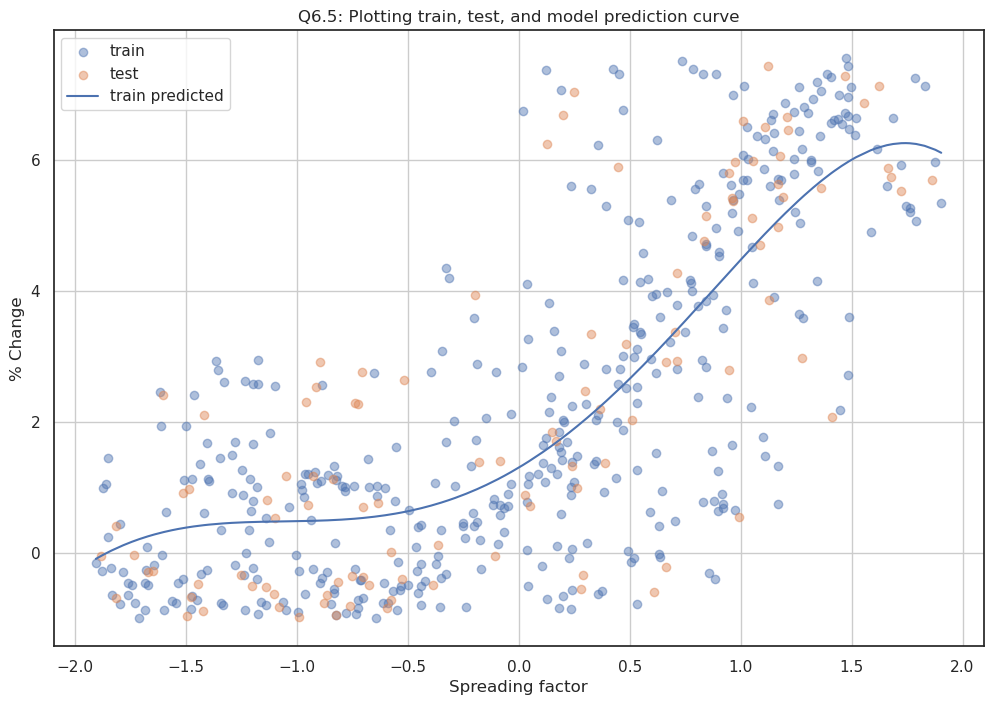

In [107]:
# Plot model from training set (guesstimated model)
plot_model('6.5', lasso_model, lasso_train, lasso_train_df)  

In [108]:
results_df = pd.DataFrame(results)
results_df

,model,train_mse,test_mse
0,2.2,2.653407,2.651906
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.570849,2.598743
4,6.4,2.573784,2.595994


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.6</b></div>

**What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.4 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.4 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.4 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?


_Points:_ 6

In [109]:
q5_best_degree, q6_best_degree

(5, 5)

In [110]:
diff = abs(results_df['test_mse'][3] - results_df['test_mse'][4])
print(f"Test MSE for Q6 is lower than Q5 by {diff}")

Test MSE for Q6 is lower than Q5 by 0.002749721351995138


The test MSE for Q6 is lower than Q5 (difference shown above), suggesting that model Q6, despite with a lower poly degree, and with a higher train MSE, generalizes better than model Q5.

In [111]:
lasso_model.intercept_, lasso_model.coef_

(1.3060412764589824,
 array([ 2.02746082,  1.44468896, -0.        , -0.26844464, -0.03044216]))

In [112]:
print("Significant degree coefficients:")
for i, coef in enumerate(lasso_model.coef_):
    if abs(float(coef)) > 0.1:
        print(f"degree {i+1}: {coef}")

Significant degree coefficients:
degree 1: 2.02746082090883
degree 2: 1.4446889573341757
degree 4: -0.2684446353951795


Using a threshold of 0.1 for significance, only three degree coefficients - 1, 4, and 8 - are significant. The rest are not significant as these degrees do not have, or have a very weak relationship with the response.

In [113]:
results_list = pd.DataFrame(results)
r2_list = pd.DataFrame(r2_list)

In [114]:
results_list[results_list['test_mse'] == results_list['test_mse'].min()]

,model,train_mse,test_mse
4,6.4,2.573784,2.595994


In [115]:
r2_list[r2_list['test_r2'] == r2_list['test_r2'].max()]

,model,train_r2,test_r2
4,6.4,0.599179,0.624041


Yes, I would expect model from 6.4 to be more robust than it's preceding models. We began with simple linear regression with guesstimation in Q2, and sequentially added extra steps (e.g. testing max degrees, k-fold cross-validation, bootstrapping, L1 regularization, and identifying the best alpha) leading up until Q6, which combines all these steps. 

The metrics to evaluate these models are 1) lowest test MSE, 2) highest test R^. Additionally, the test MSE and R^2 values ideally have to be better than their respective train MSE and R^2 values to avoid overfitted models - in the hopes of choosing a simple model with the best predictive power.

<!-- END QUESTION -->

<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.1</b></div>

Using the `results` list, generate a bar plot illustrating the test $MSE$ values for each of the models. Display `results` as a Dataframe as well.

_Points:_ 3

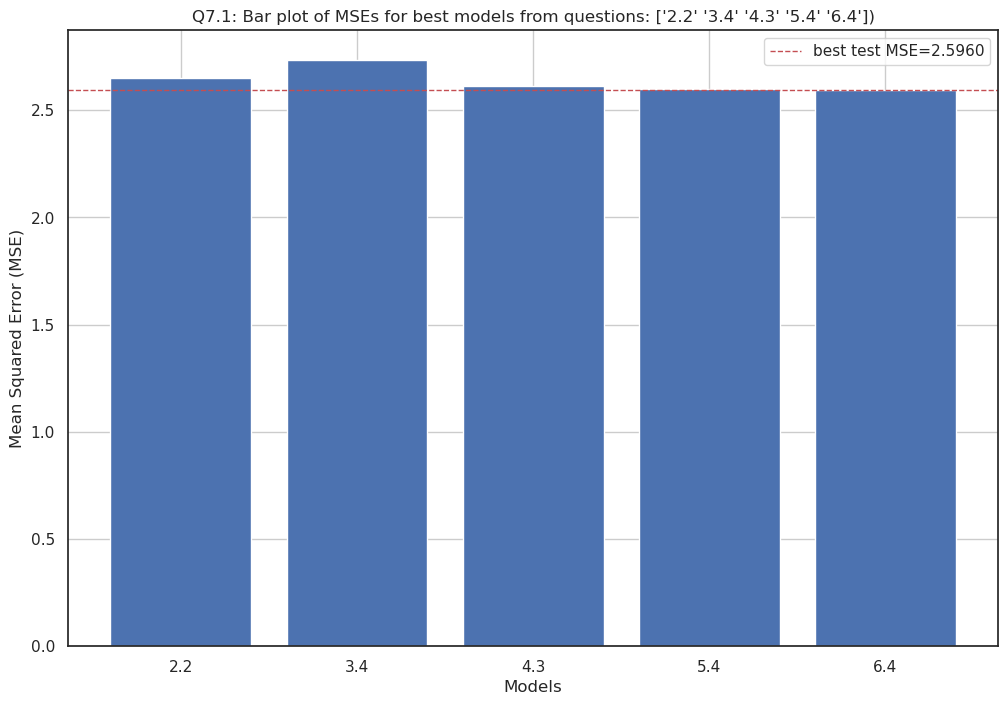

In [116]:
# plot bar plot of model MSEs
results_df = pd.DataFrame(results)

X = results_df['model']
y1 = results_df['test_mse']
y2 = results_df['train_mse']

plt.figure(figsize=(12,8))
plt.bar(X, y1)
# plt.bar(X, y2, alpha=0.4)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(ticks=X, labels=X)
plt.xlabel('Models', fontsize=12)
plt.axhline(y = np.min(y1), color='r', linewidth = 1, linestyle = "--", label=rf'best test MSE={np.min(y1):.4f}')
plt.title(f'Q7.1: Bar plot of MSEs for best models from questions: {X.values})')
plt.legend()
plt.grid()

In [117]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.653407,2.651906
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.570849,2.598743
4,6.4,2.573784,2.595994


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.2</b></div>

Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

_Points:_ 3

The best model has the lowest test MSEs and highest test R-squared values - which as shown below, belongs to model 6.4. Model Q6.4 is also parsimonious - a simpler model with greater predictive power. Thus, the current model Q6.4 is concluded to be the most robust and reliable model.

However, the drawback of the best model is that it is computationally expensive, requires a large dataset, requires a relatively large dataset, and requires some tuning by a user.

In [118]:
results_list = pd.DataFrame(results)
r2_list = pd.DataFrame(r2_list)

In [119]:
results_list, r2_list

(  model  train_mse  test_mse
 0   2.2   2.653407  2.651906
 1   3.4   2.490946  2.736483
 2   4.3   2.512517  2.613011
 3   5.4   2.570849  2.598743
 4   6.4   2.573784  2.595994,
   model  train_r2   test_r2
 0   2.2  0.586779  0.615944
 1   3.4  0.612079  0.603695
 2   4.3  0.608720  0.621576
 3   5.4  0.599636  0.623643
 4   6.4  0.599179  0.624041)

In [120]:
results_list[results_list['test_mse'] == results_list['test_mse'].min()]

,model,train_mse,test_mse
4,6.4,2.573784,2.595994


In [121]:
r2_list[r2_list['test_r2'] == r2_list['test_r2'].max()]

,model,train_r2,test_r2
4,6.4,0.599179,0.624041


<!-- END QUESTION -->

**This concludes HW3. Thank you!**

[Return to contents](#contents)